In [3]:
import numpy as np
import numpy.linalg as npl  #linear algebra
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
origin2D = np.array([0, 0])
origin3D = np.array([0, 0, 0])
scale = 10

## (행)벡터, 열벡터

In [5]:
print(np.array([1, 0]))  # (행)벡터
print(np.hstack([1, 0]))  # horizontal로 stack해라 

print(np.vstack([1, 0]))  # 열벡터 표현

[1 0]
[1 0]
[[1]
 [0]]


## 4.1.1 Determinant : 면적(2D)/부피(3D 이상) 측정 도구
#### The area of the parallelogram spanned by the vetcors **b** and **g** is |det(b,g)|.

In [6]:
g = np.vstack([1, 0])  # 열벡터 표현
b = np.vstack([0, 1])

# determinant 계산
# 1) g, b를 column vector로 갖는 matrix A 선언
A = np.hstack([g, b])
# A = np.matrix(A)
print("A: ")
print(A)
print("\n")

# 2) matrix A의 determinant 계산
print("det(A): ")
print(npl.det(A))

A: 
[[1 0]
 [0 1]]


det(A): 
1.0


<function matplotlib.pyplot.show(*args, **kw)>

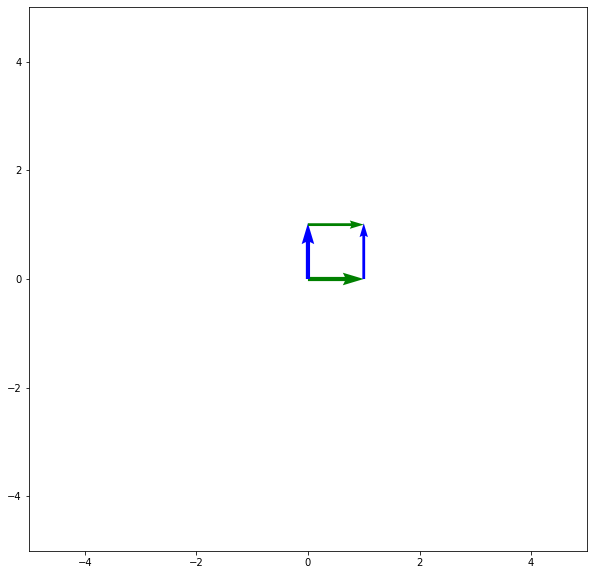

In [7]:
# 화살표 그리기 : 원점(x, y), 방향(u, v)
plt.axis([-scale/2, scale/2, -scale/2, scale/2])

plt.quiver(origin2D[0], origin2D[1], g[0], g[1], scale = scale, color = "g")
plt.quiver(origin2D[0], origin2D[1], b[0], b[1], scale = scale, color = "b")
plt.quiver(g[0], g[1], b[0], b[1], scale = scale, width = 0.005, color = "b")
plt.quiver(b[0], b[1], g[0], g[1], scale = scale, width = 0.005, color = "g")

plt.show

#### 2) The volume of the paralellepiped spanned by the vectors **r**, **g**,  **b** is |det([r,g,b])|

In [8]:
r = np.vstack([2, 0, -8])
g = np.vstack([6, 1, 0])
b = np.vstack([1, 4, -1])
A = np.hstack([r, g, b])
print("A:")
print(A)
print("\n")

print("det(A):")
print(npl.det(A))

A:
[[ 2  6  1]
 [ 0  1  4]
 [-8  0 -1]]


det(A):
-185.99999999999991


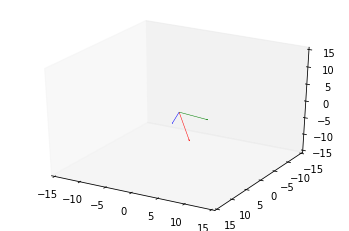

In [9]:
from mpl_toolkits import mplot3d
%matplotlib inline

# Figure setup.
fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

# determinant 그리기
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,0], A[1,0], A[2,0], color = "r", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,1], A[1,1], A[2,1], color = "g", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,2], A[1,2], A[2,2], color = "b", linewidths = .5, arrow_length_ratio = .05)

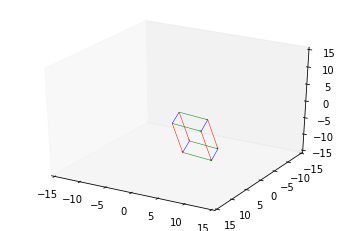

In [10]:
from mpl_toolkits import mplot3d
%matplotlib inline

# Figure setup.
fig = plt.figure()
ax = plt.axes(projection="3d")
scale3D = 15
ax.set_xlim3d(-scale3D, scale3D)
ax.set_ylim3d(scale3D, -scale3D)
ax.set_zlim3d(-scale3D, scale3D)
ax.grid(b=None)

# determinant 그리기
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,0], A[1,0], A[2,0], color = "r", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,1], A[1,1], A[2,1], color = "g", linewidths = .5, arrow_length_ratio = .05)
ax.quiver(origin3D[0], origin3D[1], origin3D[2], A[0,2], A[1,2], A[2,2], color = "b", linewidths = .5, arrow_length_ratio = .05)

import itertools as it
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label = "_nolegend_")
c = ["r","g","b"]
# 에지 그리기 반복
for i in [i for i in list(it.product([0,1,2], repeat = 2)) if i[0] != i[1]]:
    ax.quiver(A[0,i[0]], A[1,i[0]], A[2,i[0]], A[0,i[1]], A[1,i[1]], A[2,i[1]], color = c[i[1]], **quiverkey)
    
ax.quiver(A[0,1]+A[0,2], A[1,1]+A[1,2], A[2,1]+A[2,2], A[0,0], A[1,0], A[2,0], color = "r", **quiverkey)
ax.quiver(A[0,2]+A[0,0], A[1,2]+A[1,0], A[2,2]+A[2,0], A[0,1], A[1,1], A[2,1], color = "g", **quiverkey)
ax.quiver(A[0,0]+A[0,1], A[1,0]+A[1,1], A[2,0]+A[2,1], A[0,2], A[1,2], A[2,2], color = "b", **quiverkey)

plt.show()

## 4.1.3 Trace

In [11]:
# A = np.hstcak([np.vstack([3,1,6]),
#                np.vstack([4,3,-11]),
#                np.vstack([-8,7,2])])
A = np.array([[3,4,-8],
             [1,3,7],
             [6,-11,2]])
print("A:")
print(A)
print("\n")

print("Trace(A):")
print(np.trace(A))

A:
[[  3   4  -8]
 [  1   3   7]
 [  6 -11   2]]


Trace(A):
8


In [12]:
x = np.vstack([3,-1])
y = np.vstack([8,5])

print("tr(xy^T):")
yt = np.transpose(y)
print(np.trace(x.dot(yt)))  # x.dot(yt): cross product(x,y^T)
print("\n")

print("x^Ty: ")
xt = np.transpose(x)
print(xt.dot(y))

tr(xy^T):
19


x^Ty: 
[[19]]


## 4.2 Cholesky decomposition
#### A = LL<sup>T</sup>

In [13]:
A = np.vstack([[3,2,2],[2,3,2],[2,2,3]])
print("A:")
print(A)
print("\n")

print("Cholesky(A): L")
print(npl.cholesky(A))
print("\n")

print("L^T")
print(np.transpose(npl.cholesky(A)))

A:
[[3 2 2]
 [2 3 2]
 [2 2 3]]


Cholesky(A): L
[[1.73205081 0.         0.        ]
 [1.15470054 1.29099445 0.        ]
 [1.15470054 0.51639778 1.18321596]]


L^T
[[1.73205081 1.15470054 1.15470054]
 [0.         1.29099445 0.51639778]
 [0.         0.         1.18321596]]


## 4.3 Eigendecomposition
#### 1) eigen values & eigen vetors of A
#### Au =  λu

In [14]:
A = np.vstack([[4,2],[1,3]])
print("A:")
print(A)
print("\n")

e_values, e_vectors = npl.eig(A)
print(e_values)
print(e_vectors)
print("\n")

# eigen vector u1, u2
u1 = np.vstack(e_vectors[:,0])
u2 = np.vstack(e_vectors[:,1])
print("u1: ", u1)
print("u2: ", u2)

# eigen value lambda1, lambda2
l1, l2 = e_values[0], e_values[1]
print("eigen values: ", l1, l2)
print("\n")

# Check
print("Au1: ", np.dot(A, u1))
print("l1*u1: ", l1*u1)

print("Au2: ", np.dot(A,u2))
print("l2*u2: ", l2*u2)

A:
[[4 2]
 [1 3]]


[5. 2.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


u1:  [[0.89442719]
 [0.4472136 ]]
u2:  [[-0.70710678]
 [ 0.70710678]]
eigen values:  5.0 2.0


Au1:  [[4.47213595]
 [2.23606798]]
l1*u1:  [[4.47213595]
 [2.23606798]]
Au2:  [[-1.41421356]
 [ 1.41421356]]
l2*u2:  [[-1.41421356]
 [ 1.41421356]]


## 4.4 Singular value decomposition(SVD)

### 1) Stonehenge 이미지 파일 파악

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=960x635 at 0x7F701CFCCCF8>
PNG
(960, 635)
RGBA


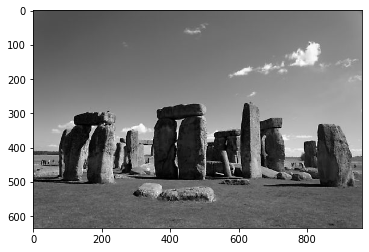

In [15]:
stonehenge = Image.open('stonehenge.png')
print(stonehenge)
print(stonehenge.format)
print(stonehenge.size)
print(stonehenge.mode)

plt.imshow(stonehenge)
plt.show()

### 2) 픽셀값 0~1 사이로 만들기

In [16]:
# RGB -> grayscale로 바꾸기
# numpy array로 바꾸기
# 0~1 사이값으로 만들기
imMatrix = np.array(stonehenge.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

(635, 960)
[[0.35294118 0.34509804 0.3372549  ... 0.48627451 0.46666667 0.48627451]
 [0.32156863 0.32941176 0.31372549 ... 0.47843137 0.45098039 0.4627451 ]
 [0.34117647 0.37647059 0.34117647 ... 0.49019608 0.47058824 0.47058824]
 ...
 [0.41568627 0.41568627 0.41960784 ... 0.39215686 0.39215686 0.4       ]
 [0.42352941 0.43137255 0.42745098 ... 0.38431373 0.39607843 0.4       ]
 [0.43137255 0.45098039 0.42745098 ... 0.37254902 0.39607843 0.39607843]]


### 3) SVD 수행

(635, 635) (635, 960) (960, 960)
True


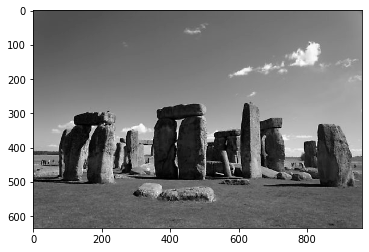

In [18]:
scalar = 1/2  # testing reconstruction of image
shape = np.shape(imMatrix)  # (h,w)
U,S,V = npl.svd(imMatrix)

# h x h identity matrix 곱하기 singuluar value(635,635)
# w ~ h만큼 뒤에 0 붙히기(635,960)
Sd = np.hstack([np.eye(shape[0])*S.copy(), np.zeros((shape[0],shape[1]-shape[0]))])
print(np.shape(U),np.shape(Sd),np.shape(V))
      
# --- image reconstruction with the SVD
# Check 1. 원본 영상 vs. U x Sd x V
# U x Sd x V
usv = U @ Sd @ V  #(python 3.5 이상)
# np.matmul(np.matmul(U, Sd), V)
# usv = U.dot(Sd).dot(V)
print(np.allclose(imMatrix, usv))  # 같으면 true
      
# Check 2. U x Sd x V 그려보기
plt.imshow(usv, cmap = 'gray')
plt.show()

### 4) A<sub>i</sub> 시각화

(635, 1)
(1, 1)
(1, 960)
2 [(635, 960), (635, 635), (635, 960), (960, 960)]
1596 1595 1.0006269592476489


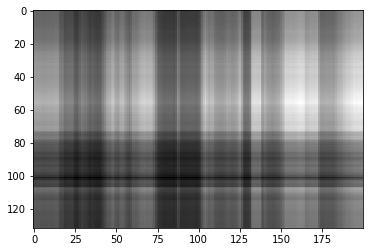

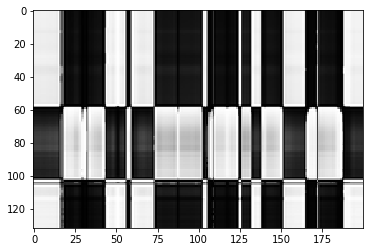

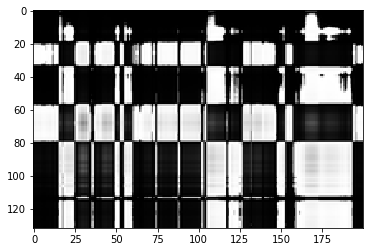

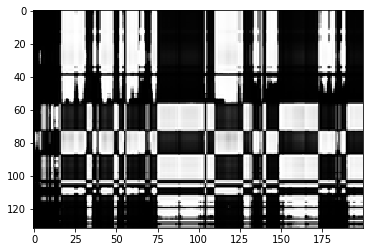

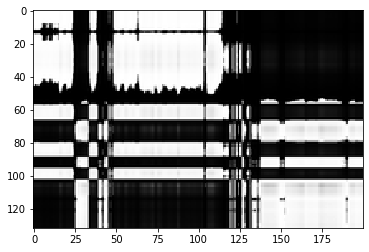

In [22]:
k = 1
print(np.shape(U[:,:k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m,n = np.shape(imMatrix)
partical, total = k*(m+n)+k, m+n
print(np.ndim(imMatrix), [np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partical, total, partical/total)

size = (200,200)
imtemp = lambda k: (np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size,Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()

### 5) A<sub>hat</sub>(i) 시각화

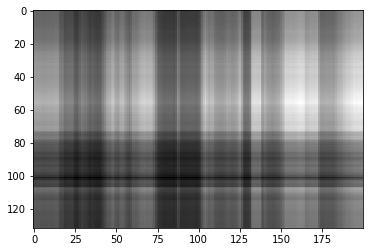

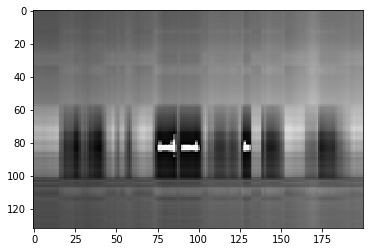

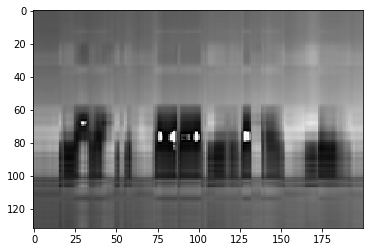

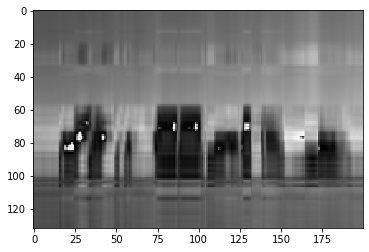

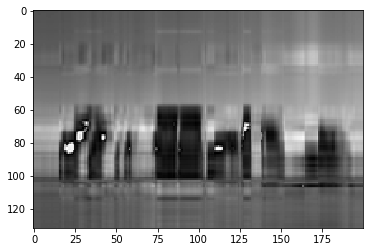

In [27]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(imMatrix)
partical,total = k*(m+n)+k, m*n
np.ndim(imMatrix),[np.shape(i) for i in [imMatrix,U,Sd,V]]

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:,:k].T)*255  # V[:K,:] alse works
for i in list(range(1,k+1)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    plt.imshow(im, cmap='gray')
    plt.show()

### 6) Rank-k  A<sub>hat</sub>(i) 시각화

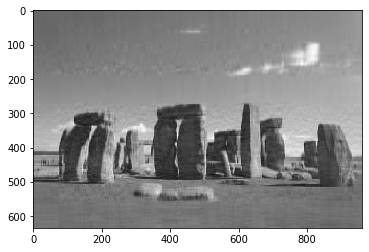

In [30]:
k = 30
im = imtemp(k)
# image.fromarray(imtep(k).astype('uint8'))  # An approximation at rank 50.
m,n = np.shape(imMatrix)
partical, total = (k*(m+n)+k, m*n)
partical, total, partical/total

plt.imshow(im, cmap='gray')
plt.show()